## Import required libraries

In [1]:
import random
import warnings
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
warnings.filterwarnings('ignore')

In [2]:
dataset_path = '../make dataset/final_data.csv'
df = pd.read_csv(dataset_path)
df.head()

text     label
0  twitch ban gambling site streamer scam folk on...      Tech
1  maury will shortstop dodger dy 89 maury will h...     Sport
2  biden say force would defend taiwan china inva...  Politics
3  beautiful sad time ukrainian cultural festival...  Politics
4  la vega ace win first wnba title chelsea gray ...     Sport

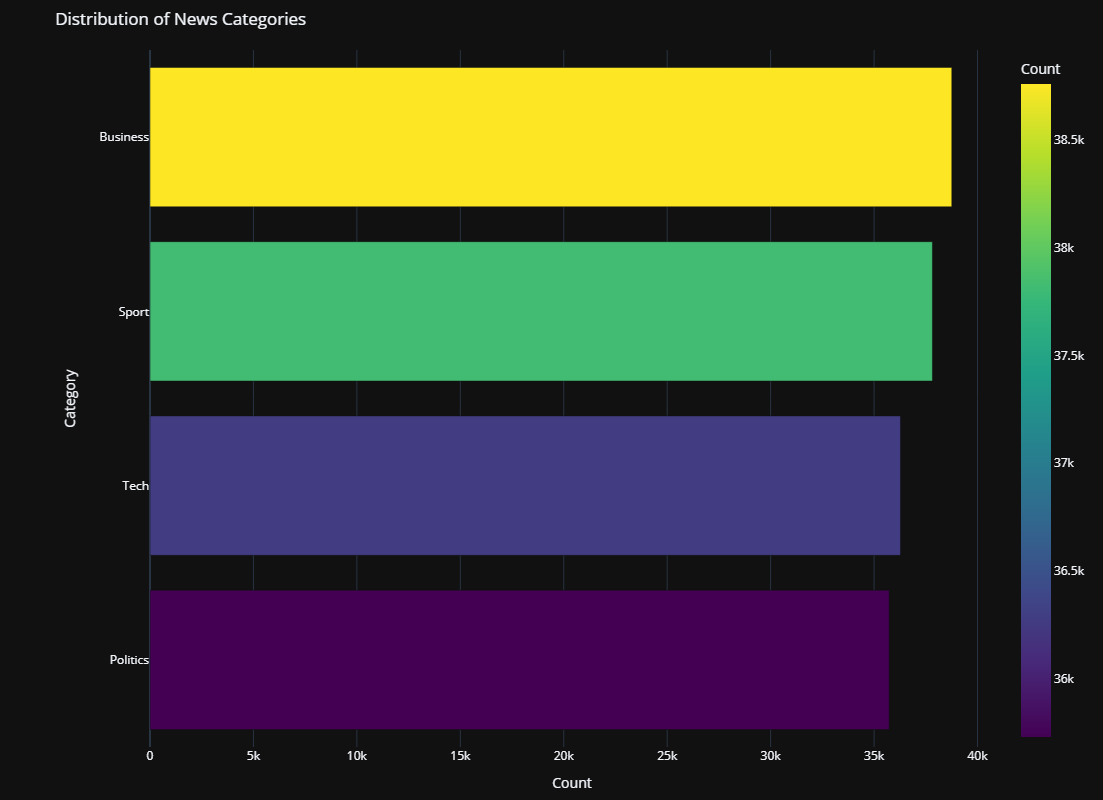

In [3]:
category_counts = df['label'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

category_counts = category_counts.sort_values(by='Count', ascending=True)

fig = px.bar(
    category_counts,
    x='Count',
    y='Category',
    orientation='h',
    title='Distribution of News Categories',
    labels={'Count': 'Number of News'},
    color='Count',
    color_continuous_scale='viridis',
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Count',
    yaxis_title='Category',
    coloraxis_colorbar=dict(title='Count'),
)

fig.update_yaxes(categoryorder='total ascending', tickmode='linear', tick0=0, dtick=1)

fig.update_layout(height=800, margin=dict(l=150, r=20, t=50, b=50))

fig.show()

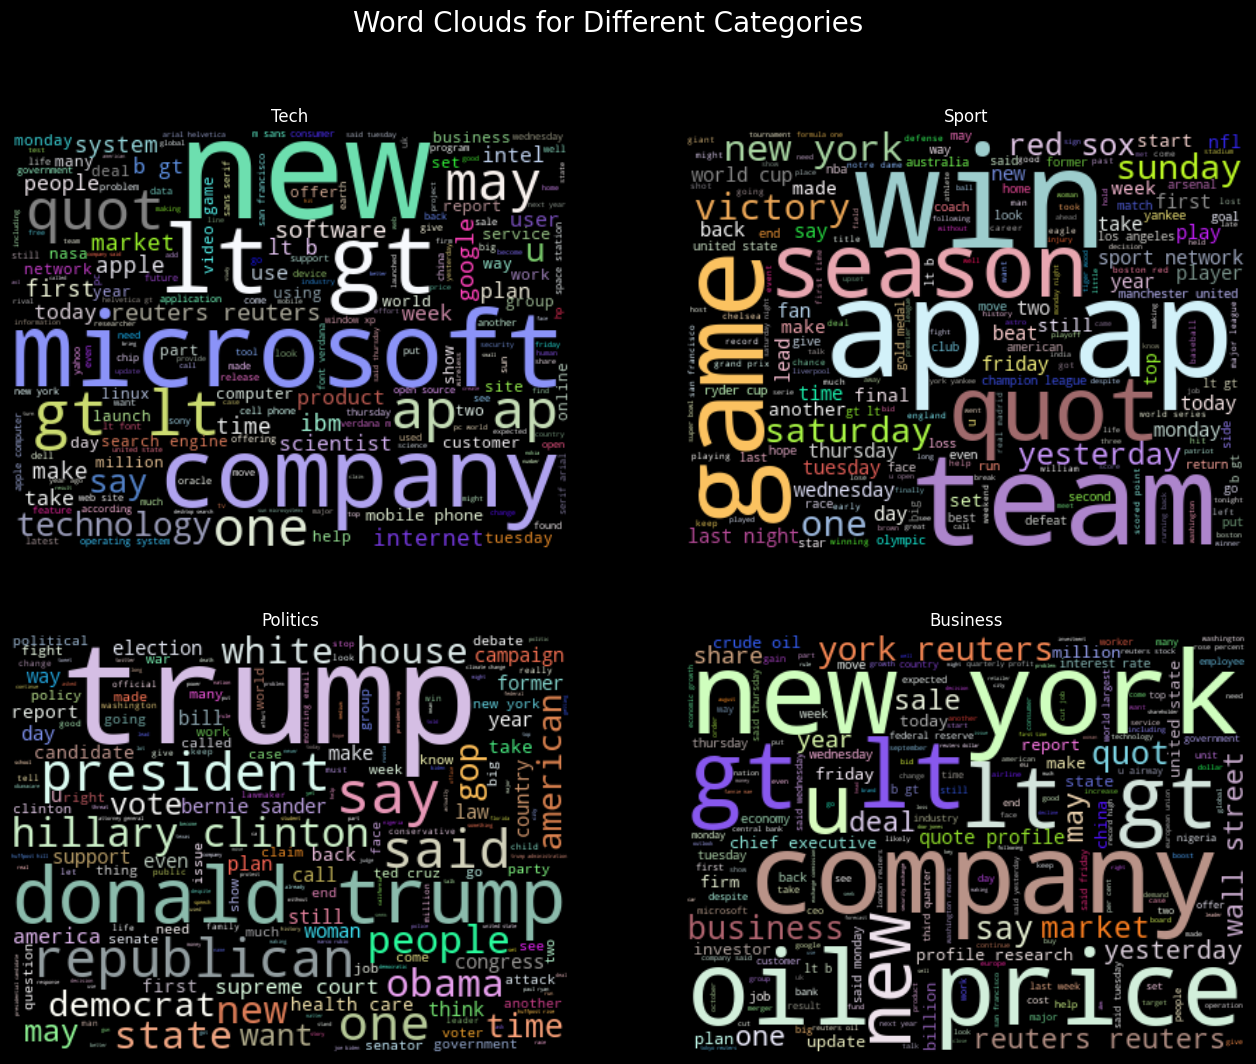

In [4]:
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * random.random())
    s = int(100.0 * random.random())
    l = int(50.0 * random.random()) + 50
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Set dark background
plt.style.use('dark_background')

# Create an interactive word cloud for each category with dark theme
fig, axes = plt.subplots(2, 2, figsize=(16, 12), subplot_kw=dict(xticks=[], yticks=[], frame_on=False))
for ax, category in zip(axes.flatten(), df['label'].unique()):
    try:
        wordcloud = WordCloud(width=400, height=300, random_state=42, max_font_size=100, background_color='black',
                          color_func=random_color_func, stopwords=STOPWORDS).generate(' '.join(df[df['label']==category]['text']))
    except:
        print(' '.join(df[df['label']==category]['text']))
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(category, color='white')  # Set title color to white for visibility
plt.suptitle('Word Clouds for Different Categories', fontsize=20, color='white')  # Set suptitle color to white
plt.show()